In [ ]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Loading Data
df = pd.read_csv("C:/Users/JK_al/OneDrive/Escritorio/Datos_2025/job_postings_flat.csv")

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DE_US = df[(df['job_title_short']=='Data Engineer') & (df['job_country']=='United States')].copy()

Locations to explore

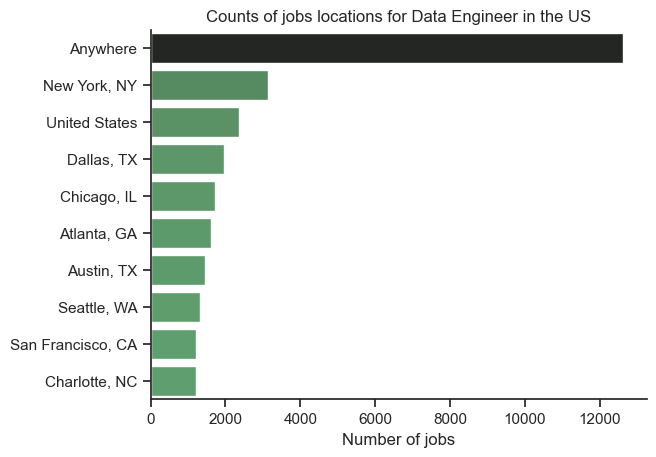

In [4]:
df_plot = df_DE_US['job_location'].value_counts().head(10).to_frame() #to_frame() lo transforma en DF
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:g_r', legend=False)
sns.despine()  # Remueve el cuadro que rodea el grafico
plt.title('Counts of jobs locations for Data Engineer in the US')
plt.ylabel('')
plt.xlabel('Number of jobs')
plt.show()

Job opportunities

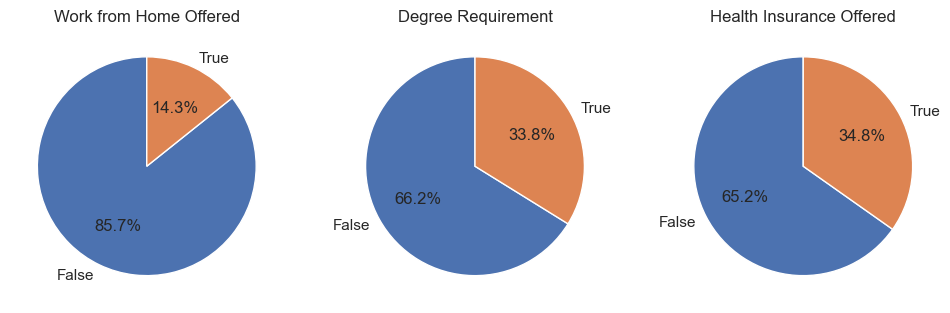

In [5]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

dict_column = {
              'job_work_from_home':'Work from Home Offered',
              'job_no_degree_mention':'Degree Requirement',
              'job_health_insurance':'Health Insurance Offered'
             }
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DE_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=[False, True])
    ax[i].set_title(title)

Companies to explore

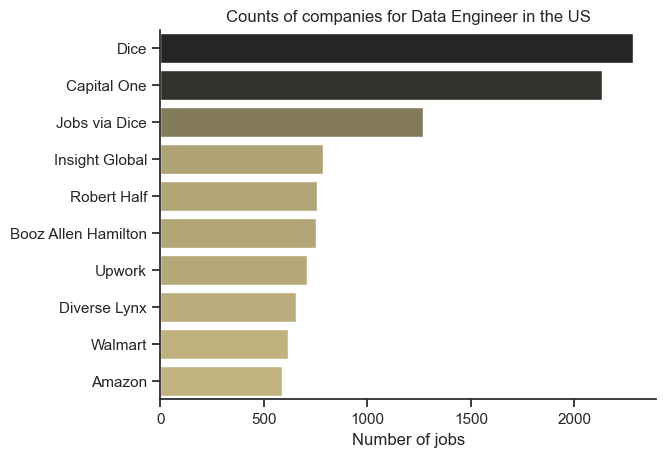

In [6]:
df_plot = df_DE_US['company_name'].value_counts().head(10).to_frame() #to_frame() lo transforma en DF
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:y_r', legend=False)
sns.despine()  # Remueve el cuadro que rodea el grafico
plt.title('Counts of companies for Data Engineer in the US')
plt.ylabel('')
plt.xlabel('Number of jobs')
plt.show()